In [1]:
import cv2 as cv
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pims, tifffile
from skimage.filters import scharr_h, scharr_v, gaussian
import random as rand
from optical_flow import OpticalFlowClient

#serial parallelization tools
from joblib import Parallel, delayed
import multiprocessing
num_cores = multiprocessing.cpu_count()

#import tkinter for simple gui
from tkinter import filedialog, Tk, Canvas, PhotoImage 
from PIL import ImageTk,Image 

#automate the boring stuff
import time, os, sys, re
beep = lambda x: os.system("echo -n '\a';sleep 0.2;" * x)
if not 'nb_dir' in globals():
    nb_dir = os.getcwd()
print('notebook is at: ' + nb_dir)

%load_ext autoreload
%autoreload 2

notebook is at: /Users/timothytyree/Documents/GitHub/optical_flow
notebook is at: /Users/timothytyree/Documents/GitHub/optical_flow


In [97]:
#for 051719Pos4
workspace_dir = '/Users/timothytyree/Desktop/Research/Rappel/Dicty. Dispersal/Python/data/data_for_dispersing_051719Pos4/optical_flow_results/'
os.chdir(workspace_dir)
flow_dir = 'flow_radial_051719_pos4_sharp.tiff'
# flow_dir = 'flow_radial_051719_pos4.tiff'
dic_dir  = '../frames051719Pos4 copy.tiff'
fret_dir = '../chnl1_051719Pos4 copy.tiff'
# path = search_for_frame_path(workspace_dir)
df_dir = '../centroid copy.csv'
dt = 0.5

In [98]:
of = OpticalFlowClient()
dic_frames = of.load_tiff_stack(dic_dir)
flow_frames = of.load_tiff_stack(flow_dir)
fret_frames = of.load_tiff_stack(fret_dir)
assert(len(dic_frames)==len(flow_frames)+1)
assert(len(flow_frames)+1==len(fret_frames))

In [99]:
df = pd.read_csv(df_dir).head(len(flow_frames))
print(df.frame.size)

353


In [100]:
onset_frame = 116
frm = 180
tme = dt*(frm-onset_frame)
print(tme)

32.0


In [110]:
flow_in = flow_frames[frm-1][...,0]
flow_out = flow_frames[frm-1][...,1]
background_frame = dic_frames[frm]#
position = tuple(np.around(df.loc[frm][['x','y']].astype('uint8').values))

In [129]:
position = (350,113)
# of.highlight?

Frame([[[ 84.        ,  84.        ,  84.        ],
        [134.        , 134.        , 134.        ],
        [141.        , 141.        , 141.        ],
        ...,
        [ 60.        ,  60.        ,  60.        ],
        [ 55.        ,  55.        ,  55.        ],
        [ 52.        ,  52.        ,  52.        ]],

       [[134.        , 134.        , 134.        ],
        [170.        , 148.37881851, 148.37881851],
        [171.        , 171.        , 171.        ],
        ...,
        [ 65.        ,  65.        ,  65.        ],
        [ 13.35000992,  54.        ,  54.        ],
        [ 29.        ,  29.        ,  29.        ]],

       [[157.        , 157.        , 157.        ],
        [176.        , 176.        , 176.        ],
        [164.        , 164.        , 164.        ],
        ...,
        [ 41.21845245,  82.        ,  82.        ],
        [  7.65874863,  49.        ,  49.        ],
        [ 11.        ,  11.        ,  11.        ]],

       ...,

       [[150.        , 150.        , 150.        ],
        [153.        , 153.        , 153.        ],
        [158.        , 158.        , 158.        ],
        ...,
        [133.        ,  58.34776306,  58.34776306],
        [112.        ,  37.11566162,  37.11566162],
        [118.        , 118.        , 118.        ]],

       [[152.        , 152.        , 152.        ],
        [149.        , 149.        , 149.        ],
        [150.        , 150.        , 150.        ],
        ...,
        [104.        ,  29.40078735,  29.40078735],
        [ 82.        ,   7.18643951,   7.18643951],
        [ 88.        ,  88.        ,  88.        ]],

       [[152.        , 152.        , 152.        ],
        [154.        , 154.        , 154.        ],
        [160.        , 160.        , 160.        ],
        ...,
        [104.        , 104.        , 104.        ],
        [ 90.        ,  90.        ,  90.        ],
        [ 85.        ,  85.        ,  85.        ]]])
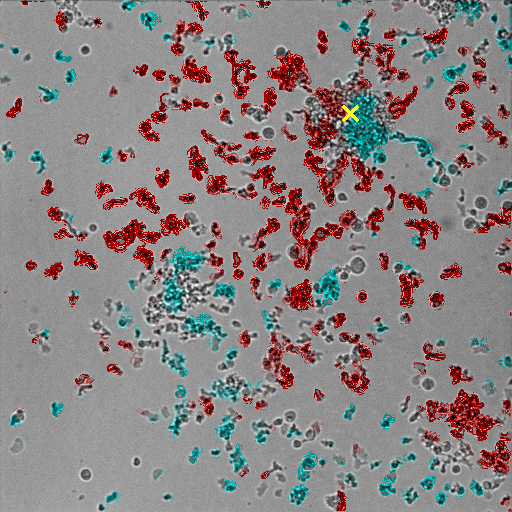

In [130]:
of.hue_scale_red = 100
of.hue_scale_blue = 100
retval = of.highlight(position=position, flow_in=flow_in, flow_out=flow_out, background_frame=background_frame)
retval

In [131]:
from mark_images import *

True

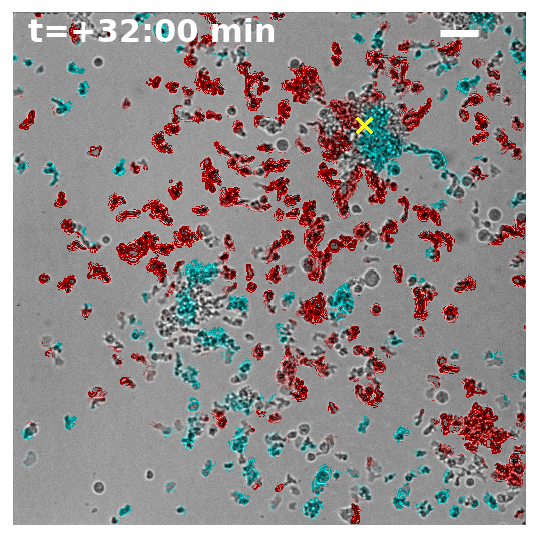

In [132]:
# make_input_image(self, img, message = None, time_stamp = None, save_file_name = None)
# os.chdir(nb_dir+'/../data/the_big_busts')
# file_name_pic = 'pic_120519_pos7_prebusted.png'
time_stamp = 't=+32:00 min'
# save_file_name = file_name_pic.replace('.png', '_formatted.png')
# trialnum = '120519_pos4'
# img = pims.image_reader.imread(file_name_pic)
# img = pims.frame.Frame(img)
save_file_name = f'test_sharp.png'
img = pims.frame.Frame(retval)
img = pims.normalize(img)
make_input_image(img, save_file_name, message=None, time_stamp=time_stamp, y_start = 505,lamda = 1.33, uml=50, width = 4)




In [76]:
img = retval




/Users/timothytyree/Desktop/Research/Rappel/Dicty. Dispersal/Python/data/data_for_dispersing_051719Pos4/optical_flow_results


Frame([[[0.32941176, 0.32941176, 0.32941176],
        [0.5254902 , 0.5254902 , 0.5254902 ],
        [0.55294118, 0.55294118, 0.55294118],
        ...,
        [0.23529412, 0.23529412, 0.23529412],
        [0.21568627, 0.21568627, 0.21568627],
        [0.20392157, 0.20392157, 0.20392157]],

       [[0.5254902 , 0.5254902 , 0.5254902 ],
        [0.66666667, 0.60731441, 0.60731441],
        [0.67058824, 0.67058824, 0.67058824],
        ...,
        [0.25490196, 0.25490196, 0.25490196],
        [0.06829415, 0.21176471, 0.21176471],
        [0.11372549, 0.11372549, 0.11372549]],

       [[0.61568627, 0.61568627, 0.61568627],
        [0.69019608, 0.69019608, 0.69019608],
        [0.64313725, 0.64313725, 0.64313725],
        ...,
        [0.17763376, 0.32156863, 0.32156863],
        [0.04624656, 0.19215686, 0.19215686],
        [0.04313725, 0.04313725, 0.04313725]],

       ...,

       [[0.58823529, 0.58823529, 0.58823529],
        [0.6       , 0.6       , 0.6       ],
        [0.61960784, 0.61960784, 0.61960784],
        ...,
        [0.52156863, 0.31664092, 0.31664092],
        [0.43921569, 0.23365084, 0.23365084],
        [0.4627451 , 0.4627451 , 0.4627451 ]],

       [[0.59607843, 0.59607843, 0.59607843],
        [0.58431373, 0.58431373, 0.58431373],
        [0.58823529, 0.58823529, 0.58823529],
        ...,
        [0.40784314, 0.20306099, 0.20306099],
        [0.32156863, 0.11619806, 0.11619806],
        [0.34509804, 0.34509804, 0.34509804]],

       [[0.59607843, 0.59607843, 0.59607843],
        [0.60392157, 0.60392157, 0.60392157],
        [0.62745098, 0.62745098, 0.62745098],
        ...,
        [0.40784314, 0.40784314, 0.40784314],
        [0.35294118, 0.35294118, 0.35294118],
        [0.33333333, 0.33333333, 0.33333333]]])
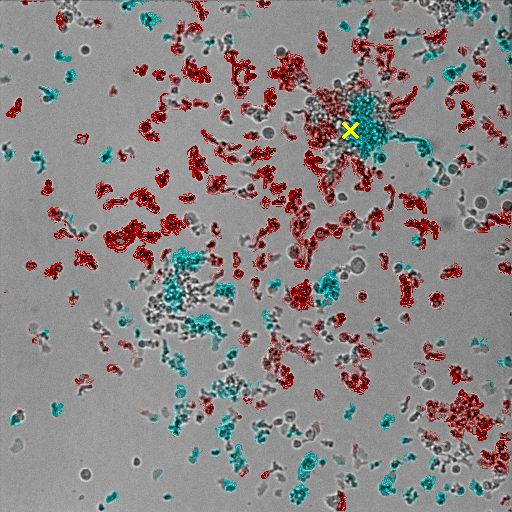